---
# **[ Project ] Airbnb 데이터를 활용한 데이터 분석**

----
#### 본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 추가 전처리 + 분석으로 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
 1) 뉴욕시 지도위의 Airbnb를 전사해 보는 것으로 지역별 가격을 비교해봅니다. <br>
 2) 방의 타입별로 가격에 차이가 있는지 분석해봅니다. 
 


---
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 Airbnb 데이터입니다.
   - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib, re
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.

### ③ 필드 ###
- id, name, host_id, host_name  
- neighbourhood_group, neighbourhood, latitude, longitude  
- room_type, price, minimum_nights
- number_of_reviews, last_review, reviews_per_month  
- calculated_host_listings_count, availability_365  

---
## 2. 데이터 읽기

### **해당 챕터의 목표**
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.
- Null 데이터의 개수를 확인하는 것으로 전처리를 하기 위한 배경 지식을 얻습니다.

_제공되는 코드_

In [1]:
import pandas as pd 

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요) 
- read_csv, columns, shape, isnull, sum

### [Quiz 1] pandas의 함수를 사용하여 AB_NYC_2019.csv을 읽어와 data라는 이름의 변수로 저장합니다.


In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### [Quiz 2] data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.


In [3]:
print(data.columns, data.shape[1], data.shape[0])
data.info()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object') 16 48895
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude       

### [Quiz 3] data 의 필드명 null 데이터의 숫자를 출력합니다.

In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다.<br> 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. <br> 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수 (다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull

### [Quiz 4] name과 host_name에서 null인 데이터를 제거합니다.

In [5]:
data.dropna(subset=['name'], axis=0, inplace=True)
data

data.dropna(subset=['host_name'], axis=0, inplace=True)

data

data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Price의 백분위를 구해 이상치를 제거합니다.
- 제공 된 지도 위에 데이터를 매핑하는 것으로 뉴욕시의 지역별 Airbnb 가격 분포를 확인해봅니다.

제공되는 코드

In [6]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data

# 3번 문제
# newyorkcity = plt.imread('newyorkcity.png')
# plt.figure(figsize=(10,8))
# plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
# ax = plt.gca()

### _데이터 시각화 문제_
- 전처리가 완료된 데이터를 사용해주세요.
- Quiz6과 Quiz7에서는 아래의 파라미터를 사용해주세요.  
    - cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8)

문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- describe, plot, show

### [Quiz 5] price의 백분위 5%, 25%, 50%, 75%, 95% 를 구합니다.

In [7]:
data.price.quantile([.05, .25, .50, .75, .95])

0.05     40.0
0.25     69.0
0.50    106.0
0.75    175.0
0.95    355.0
Name: price, dtype: float64

### [Quiz 6] price의 백분위 95% 값보다 큰 데이터를 필터링(->제거한) 후, x축을 longitude y축을 latitude, c값(그래프에서의 색상)을 price로 하는 scatter 그래프를 그립니다.

In [8]:
low95 = data[data.price < data.price.quantile(0.95)]
low95

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

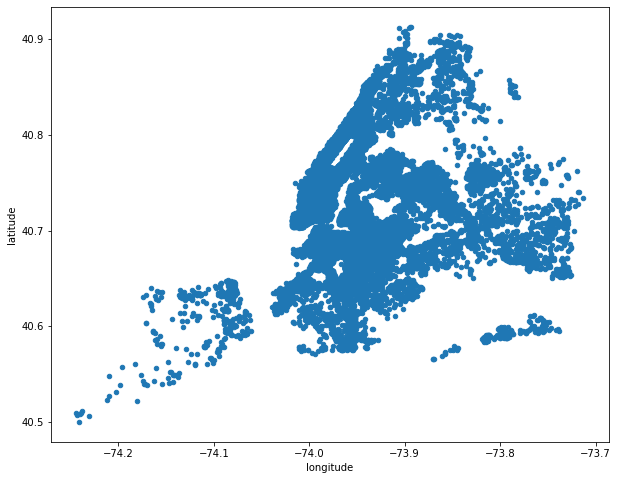

In [9]:
data.plot.scatter(x='longitude', y='latitude', figsize=(10, 8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

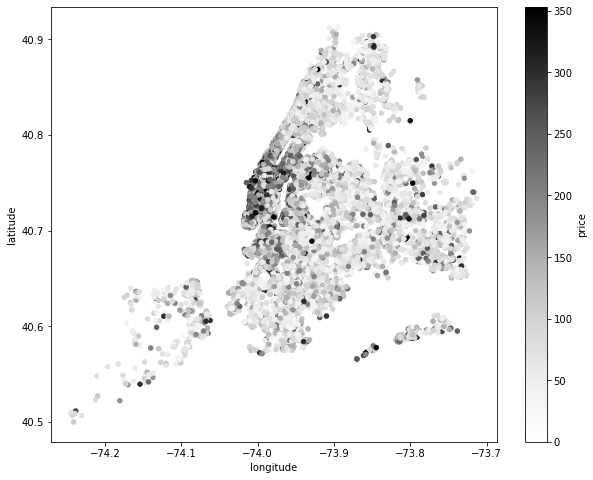

In [10]:
low95.plot.scatter(x='longitude', y='latitude', c='price', figsize=(10, 8), sharex=False)

### [Quiz 7] 첨부된 New_York_City_.png 위에다가 퀴즈 6의 Scatter 그래프를 그립니다.

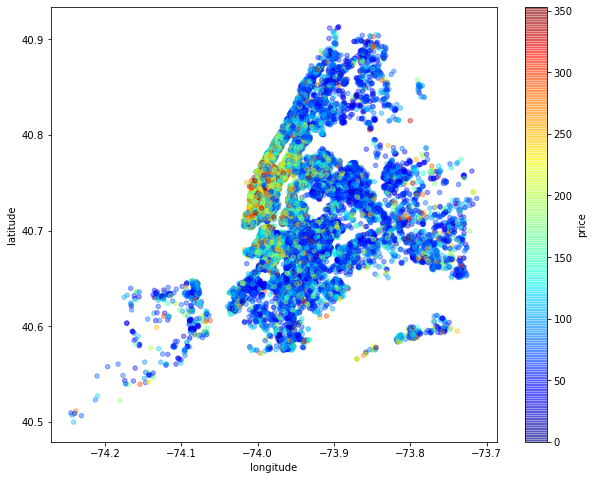

In [11]:
low95.plot.scatter(x='longitude', y='latitude', c='price', sharex=False,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.show()

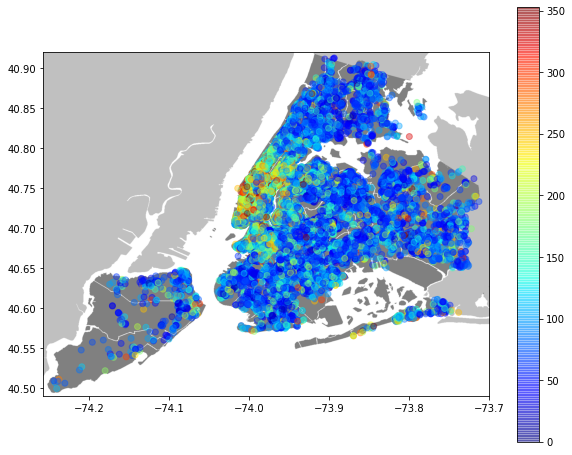

In [12]:
newyorkcity = plt.imread('newyorkcity.png')
plt.figure(figsize=(10, 8))
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
plt.scatter(x='longitude', y='latitude', c='price', data=low95, cmap=plt.get_cmap('jet'), alpha=0.4)
plt.colorbar()
plt.show()

---
## 5. 데이터 추가 전처리 + 분석

### **해당 챕터의 목표**
- 분석 목표에 따라 추가 전처리가 필요한 경우가 있습니다. 이번 프로젝트에서는 분석 전 추가 전처리를 진행합니다.
- 이상한 문자열이 들어간 데이터를 제거하는 것으로 조금 더 formal한 데이터만을 타게팅합니다.
- room_type 이 가격에 영향을 끼치는지를 히스토그램으로 분석해봅니다.
- sql 문을 사용하여 원하는 데이터를 추출해봅니다.

제공되는 코드

In [13]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import re
analysis_data = data

# 4번 문제
import sqlite3
conn = sqlite3.connect(':memory:')
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)
# 4번 예제
# pd.read_sql('select * from data', conn)

### _데이터 추가 전처리 + 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- compile, unique, groupby, get_group, reset_index, head, hist, read_sql

### [Quiz 8]  re 함수 사용 : name 필드에 영문, 숫자, '.', ',', '-', '#', 공백 외의 문자가 들어가 있는 데이터를 필터(->제거)합니다.

In [14]:
name = re.compile(r'[%A-Za-z0-9.,#-]')
name

re.compile(r'[%A-Za-z0-9.,#-]', re.UNICODE)

### [Quiz 9] room_type의 모든 값을 구합니다. room_type으로 데이터를 GroupBy합니다. 각 Group 별로 price가 가장 높은 데이터의 (name, hostId, price)를 출력합니다. 동일한 값을 가지는 데이터가 있다면 전부 출력합니다.

In [15]:
analysis_data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
Private_room = analysis_data.groupby('room_type').get_group('Private room')

In [17]:
Private_room.sort_values(by='price', ascending=False).iloc[:, [1, 2, 9]].head()

,name,host_id,price
9151,Furnished room in Astoria apartment,20582832,10000
12342,"Quiet, Clean, Lit @ LES & Chinatown",3906464,9999
45666,Gem of east Flatbush,262534951,7500
37194,Apartment New York \nHell’s Kitchens,35303743,6500
4345,NearWilliamsburg bridge 11211 BK,14908606,5000


In [18]:
Entire_home_apt = analysis_data.groupby('room_type').get_group('Entire home/apt')

In [19]:
Entire_home_apt.sort_values(by='price', ascending=False).iloc[:, [1, 2, 9]].head()

,name,host_id,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,10000
29238,1-BR Lincoln Center,72390391,10000
6530,Spanish Harlem Apt,1235070,9999
40433,2br - The Heart of NYC: Manhattans Lower East ...,4382127,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,8500


In [20]:
Shared_room = analysis_data.groupby('room_type').get_group('Shared room')

In [21]:
Shared_room.sort_values(by='price', ascending=False).iloc[:, [1, 2, 9]].head()

,name,host_id,price
14380,Mins away to Manhattan Suite Residence,24146326,1800
30080,Artist apartment in LIC,51260506,1250
3700,An Accomodating Apartment on Wall,11385753,1000
23545,1BR/1BA in 2BR/2BA Flushing,356490,1000
36571,"Park Avenue midtown apartment, walk to everything",1163709,800


### [Quiz 10] room_type이 가격에 영향을 주는지를 확인하기 위해 하나의 그래프 위에 그룹별로 0~500까지의 price위에서 10단위로 히스토그램을 그립니다.

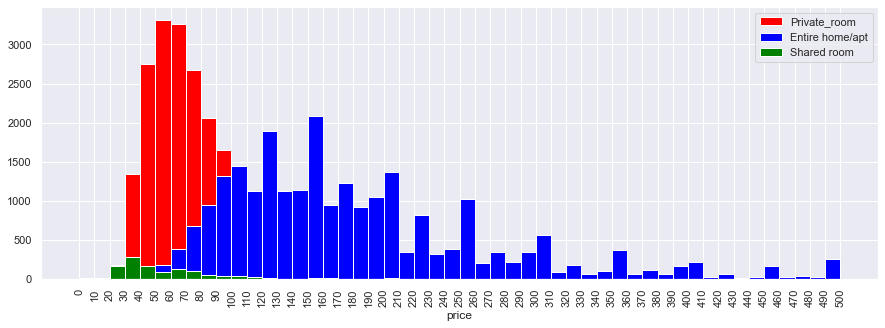

In [22]:
import seaborn as sns
sns.set(color_codes=True)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.hist(Private_room.price, bins=range(0, 501, 10), label='Private_room', color='red')
ax.hist(Entire_home_apt.price, bins=range(0, 501, 10), label='Entire home/apt', color='blue')
ax.hist(Shared_room.price, bins=range(0, 501, 10), label='Shared room', color='green')

plt.legend(loc='best')
plt.xlabel('price')
plt.xticks(range(0, 501, 10), rotation=90)
plt.show()

### [Quiz 11] SQL 사용 : 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id를 구한 후, 각 host_id별로 price의 평균을 구합니다. count가 많은 순서대로 출력합니다.

In [23]:
import sqlite3

conn = sqlite3.connect(':memory:')
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)

pd.read_sql('select * from data', conn)

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48853,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,None,NaN,2,9
48854,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,None,NaN,2,36
48855,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,None,NaN,1,27
48856,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,None,NaN,6,2


In [24]:
pd.read_sql('select host_id, \
             AVG(price) as mean_price, \
             count() as count \
             from data \
             group by host_id \
             order by count desc \
             limit 10', conn)

,host_id,mean_price,count
0,219517861,253.195719,327
1,107434423,303.150862,232
2,30283594,277.528926,121
3,137358866,43.825243,103
4,16098958,208.958333,96
5,12243051,213.031250,96
6,61391963,146.241758,91
7,22541573,215.436782,87
8,200380610,290.230769,65
9,7503643,149.192308,52
